<center><h1> 3η Εργαστηριακή Άσκηση</h1></center>

<center><h2>Σύνδεση με προπαρασκευή και διόρθωση σφαλμάτων</h3></center>

Η δομή του project είναι παρόμοια με αυτή της προπαρασκευής με την διαφορά ότι τώρα θα βασιστούμε μόνο στο __Semeval 2017 Task4-A dataset__ και θα έχουμε πολλά διαφορετικά μοντέλα. Έτσι, δημιουργήθηκε ο φάκελος __models/__ όπου μέσα θα περιέχει όλα τα μοντέλα που θα χρησιμοποιήσουμε για την εκπαίδευση του μοντέλου (επίσης στον κώδικα διέγραψα ότι αφορούσε την προπαρασκευή όπως κάποιες εκτυπώσεις ή το loss function για το MR dataset). Τα embeddings θα παραμείνουν τα __twitter glove embeddings__ που βρίσκονται στον φάκελο __embeddings/__.

Προτού συνεχίσουμε όμως στα βήματα του εργαστηρίου και την κατασκευή των μοντέλων πρέπει να επισημανθούν ορισμένες αλλαγές που έγιναν στον κώδικα της προπαρασκευής μιας και αυτός θα χρησιμοποιηθεί και ως βάση για την συνέχεια. Συγκεκριμένα, είχα παρατηρήσει ότι το test loss δεν ήταν καθόλου καλό και έκανε συνεχώς "ταλαντώσεις" οπότε προσπάθησα να βελτιώσω και άλλο την προπεξεργασία των δεδομένων και τον ορισμό των υπερπαραμέτρων. Τα σημαντικά λάθη που έγιναν και διορθώθηκαν αναφέρονται παρακάτω:

- Στο tokenization __δεν μετέτρεπα τις λέξεις σε lowercase__ με αποτέλεσμα χωρίς lower case να έχω 369007 στο train και 83017 στο test oov words σε train και test set αντίστοιχα ενώ μετά το lowercase να έχω 126054 και 38865 oov words. Υπολογίζοντας ότι ο συνολικός αριθμός λέξεων στο train και στο test set είναι 1206783 και 233218 αντίστοιχα, __έχουμε μείωση περίπου 20% στο train και 19% στο test set των oov words__.

- Το tokenization που έκανα με τον Twitter tokenizer του nltk δεν είχε πολύ καλά αποτελέσματα για το dataset του Semeval2017A οπότε __χρησιμοποιήσα τον SocialTokenizer του ekphrasis__ με αποτέλεσμα οι oov words να __μειωθούν κατά 2% στα δυο set__ (έχουμε 99050 ή 8% τελικά στο train set και 33664 ή 14% στο test set).

- Μία ακόμα αλλαγή που έγινε είναι στην επιλογή του σταθερού μήκους που πρέπει να έχουν οι προτάσεις, όπου οι μικρότερες προτάσεις συμπληρώνονται με μηδενικά (zero padding) και οι μεγαλύτερες κόβονται. Η επιλογή γινόταν μέσω του __bestLength.py__ στο οποίο εμφανίζα ένα scatterplot με τα μεγέθη για κάθε πρόταση και επέλεγα το 40 ώστε να κοπούν μόνο τα outliers. Αυτό που δεν φαινόταν όμως είναι ότι οι περισσότερες προτάσεις έχουν μικρότερο μήκος απλά το scatter plot ήταν πολύ πυκνή αναπαράσταση για να το δέιξει. Έτσι, τροποποίηθηκε το bestLength.py ώστε να εμφανίζει ένα ιστόγραμμα με τα μεγέθη, την μέση τιμή και την τυπική απόκλιση για κάθε ένα από τα δύο set μας. Όταν το τρέχουμε βλέπουμε τα παρακάτω:

Size of train set: 49570
Mean value of train set: 24.345027234214243
Variance of train set is: 6.685360783381769
Size of test set: 12284
Mean value of test set: 18.985509605991535
Variance of test set is: 6.903150432448993


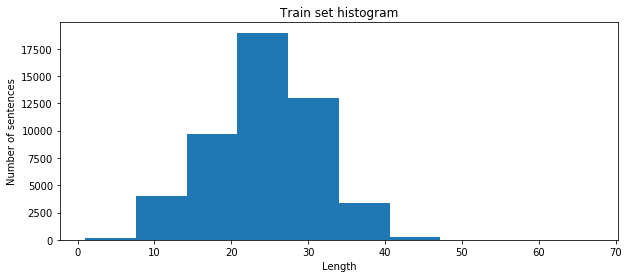

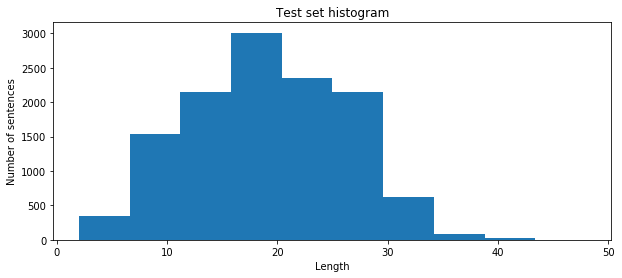

In [6]:
%run ../bestLength.py Semeval2017A

Παρατηρούμε, λοιπόν, ότι το 30 είναι μία καλή επιλόγη για το μέγεθος και όχι το 40 που είχα διότι οι περισσότερες προτάσεις είναι μέχρι εκεί οπότε και δεν θα χάσουμε πληροφορία και παράλληλα δεν θα έχουμε πολλά μηδενικά στις μικρότερες προτάσεις.

- Τέλος, άλλαξα και το hidden size του BaselineDNN που χρησιμοποιούσαμε στην προπαρασκευή διότι ήταν μεγάλο (128) και το μοντέλο έκανε πολύ γρήγορα overfit (γι'αυτό και οι ταλαντώσεις). Μετά από ορισμένες δοκιμές το όρισα ίσο με 32. Ακόμη, οι εποχές μειώθηκαν σε 30.

<center> <h2> Εισαγωγή </h2></center>

Στην προπαρασκευή, σχεδιάσαμε απλές αρχιτεκτονικές νευρωνικών δικτύων για κατηγοριοποίηση κειμένων, χρησιμοποιώντας προ-εκπαιδευμένες διανυσματικές αναπαραστάσεις λέξεων (pretrained word embeddings). Σκοπός αυτής της εργαστηριακής άσκησης είναι να εμβαθύνουμε χρησιμοποιώντας __Ανατροφοδοτούμενα Νευρωνικά Δίκτυα (Recurrent Neural Networks), τεχνικές Μεταφοράς Γνώσης (Transfer Learning) και μηχανισμούς Προσοχής (Attention mechanisms).__ Στην προπαρασκευή του εργαστηρίου, η αρχιτεκτονική η οποία μας έχει ζητηθεί να φτιάξουμε είναι η εξής:

<img src="photos/prolab-equations.png">

όπου r η διανυσματική αναπαράσταση ενός κειμένου (feature vector). Στόχος είναι να δημιουργήσουμε καλύτερες αναπαραστάσεις χρησιμοποιώντας τις προαναφερθείσες τεχνικές.

<center><h2> Επιλογή συνόλου δεδομένων και pretrained word embeddings </h2></center>

- Το σύνολο δεδομένων που θα χρησιμοποιήσουμε είναι το __Semeval 2017 Task4-A__ 3 [Rosenthal et al., 2017]. To dataset αυτό περιέχει tweets τα οποία είναι κατηγοριοποιημένα σε 3 κλάσεις (positive, negative, neutral) με 49570 παραδείγματα εκπαίδευσης και 12284 παραδείγματα αξιολόγησης.
- Τα word embeddings που θα χρησιμοποιήσουμε είναι τα __Glove twitter embeddings__ τα οποία είναι διαθέσιμα [εδώ](https://nlp.stanford.edu/projects/glove/). Συγκεκριμένα όλα τα αποτελέσματα που θα παρουσιαστούν έχουν προκύψει στα embeddings 50 διαστάσεων τα οποία λόγω του μεγέθους του είναι πολύ αποδοτικά (επηρεάζοντας βέβαια αρνητικά την επίδοση του μοντέλου).

<center> <h2> Ερωτήματα </h2></center>

### Ερώτημα 1

<img src="photos/question1-1.png">

Πρέπει, λοιπόν, να τροποποιήσουμε την μέθοδο __forward__ στο BaselineDNN() όπου στην προπαρασκευή η αναπαράσταση κάθε πρότασης υπολογιζόταν ως το mean pooling των word embeddings. Τώρα, μαζί με το mean pooling θα υπολογίζουμε και το max pooling και θα συνενώνουμε τις δύο αυτές αναπαραστάσις για να προκύψει η τελική αναπαράσταση της πρότασης. Όπως και στην προπαρασκευή, για τον σταδιακό έλεγχο του μοντέλου μας υλοποιούμε την όλη διαδικασία για ένα ενδεικτικό mini-batch και βλέπουμε ότι η αναπαράσταση είναι η αναμενόμενη. Επίσης, πρέπει να αλλάξουμε και τον ορισμό του πρώτου Linear Layer που κάνει προβολή των αρχικών features στο hidden size αφού τώρα παίρνει ως είσοδο το διπλάσιο μέγεθος από πριν.

In [2]:
# -------------------- #
# Forward pass testing #
# -------------------- #
import torch
import torch.nn as nn
# Lengths definitions
max_length = 6
n_embeddings = 4
batch_size = 2
embeddings_size = 5
hidden_size = 8

# Create embeddings array
embeddings = np.array([[0, 1, 2, 3, 4],[0, 2, 4, 6, 8], [1, 3, 5, 7, 9], [4, 3, 2, 1, 0]])
# Define a embedding layer
embed = nn.Embedding(num_embeddings = n_embeddings, embedding_dim = embeddings_size)
# Initialize the weights of the embedding layer with embeddings array.
embed.load_state_dict({'weight': torch.from_numpy(embeddings)})
# Make embedding layer non-trainable
embed.weight.requires_grad = False

# Create a mini batch with some data
x = torch.from_numpy(np.array([[3, 0, 0, 1, 2, 1], [0, 1, 2, 3, 1, 0]])).long()
# Create the lengths array
lengths = np.array([5, 3])
print("INPUTS")
print("Input batch shape is: ", x.shape)
print("Input batch is: ")
print(x)
print("Input lengths array is: ", lengths)
print()

# 1. Pass it through the embedding layer.
embeddings = embed(x)
print("STEP 1")
print("Output of embedding layer has shape: ", embeddings.shape)
print("Output of embedding layer is: ")
print(embeddings)
print()

# 2. Create a representation for each sentence by computing the mean pooling.
representations_mean = torch.zeros([batch_size, embeddings_size])
for i in range(batch_size):
    representations_mean[i] = torch.sum(embeddings[i], dim=0) / lengths[i]
print("STEP 2")
print("Mean pooling representation of sentences has shape: ", representations_mean.shape)
print("Mean pooling representation of sentences: ")
print(representations_mean)
print()

# 3. Create a representation for each sentence by computing the max pooling.
representations_max = torch.zeros([batch_size, embeddings_size])
for i in range(batch_size):
    representations_max[i],_ = torch.max(embeddings[i], dim=0)
print("STEP 3")
print("Max pooling representation of sentences has shape: ", representations_max.shape)
print("Max pooling representation of sentences: ")
print(representations_max)
print()

# 3. Create the final representation for each sentence by concatenating mean and max pooling.
representations = torch.cat((representations_mean, representations_max), 1)
print("STEP 4")
print("Final representation of sentences has shape: ", representations.shape)
print("Final representation of sentences: ")
print(representations)

INPUTS
Input batch shape is:  torch.Size([2, 6])
Input batch is: 
tensor([[3, 0, 0, 1, 2, 1],
        [0, 1, 2, 3, 1, 0]])
Input lengths array is:  [5 3]

STEP 1
Output of embedding layer has shape:  torch.Size([2, 6, 5])
Output of embedding layer is: 
tensor([[[4., 3., 2., 1., 0.],
         [0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.],
         [0., 2., 4., 6., 8.],
         [1., 3., 5., 7., 9.],
         [0., 2., 4., 6., 8.]],

        [[0., 1., 2., 3., 4.],
         [0., 2., 4., 6., 8.],
         [1., 3., 5., 7., 9.],
         [4., 3., 2., 1., 0.],
         [0., 2., 4., 6., 8.],
         [0., 1., 2., 3., 4.]]])

STEP 2
Mean pooling representation of sentences has shape:  torch.Size([2, 5])
Mean pooling representation of sentences: 
tensor([[ 1.0000,  2.4000,  3.8000,  5.2000,  6.6000],
        [ 1.6667,  4.0000,  6.3333,  8.6667, 11.0000]])

STEP 3
Max pooling representation of sentences has shape:  torch.Size([2, 5])
Max pooling representation of sentences: 
tensor([[4., 3.,

Και τα αποτελέσματα με αυτό το νέο BaselineDNN σε 30 εποχές με batch size ίσο με 120 και hidden layer size ίσο με 32 είναι τα παρακάτω:

<img src="photos/MeanMax_output.png">

   <tr>
    <td> <img src="photos/MeanMax_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/MeanMax_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

<img src="photos/question1-2.png">

Στο mean pooling, όπου η αναπαράσταση μιας πρότασης προκύπτει ως ο μέσος όρος των word embeddings, λέμε ότι ουσιαστικά (αν σκεφτούμε ότι κάθε διάσταση των embeddings εκφράζει μία έννοια) η σημασία της πρότασης εξαρτάται από το πόσο πολύ σχετίζονται με κάθε μία από αυτές τις έννοιες οι λέξεις που την απαρτίζουν. Όταν παίρνουμε τον μέσο όρο, είναι σαν να λέμε ότι η πρόταση εκφράζει την έννοια x αν οι περισσότερες λέξεις της εκφράζουν την έννοια x. Το πρόβλημα εδώ όμως είναι ότι υπάρχουν λέξεις με πολύ "ισχυρή" σημασία σε κάποια διάσταση οι οποίες μπορεί να καθορίζουν και τη σημασία ολόκληρης της πρότασης χωρίς οι υπόλοιπες λέξεις να είναι κόντα στην έννοια αυτή (πχ το 'δεν' για κάποια πιθανή διάσταση που εκφράζει άρνηση επηρεάζει όλη την πρόταση). Για τον λόγο αυτό παίρνουμε και το max pooling των word embeddings έτσι ώστε οι λέξεις με την μεγαλύτερη τιμή σε κάθε έννοια-διάσταση να παίζουν σημαντικό ρόλο στην τελική σημασιολογική αναπαράσταση της πρότασης.

### Ερώτημα 2

<img src="photos/question2-1.png">

Πρέπει, λοιπόν, να φτιάξουμε ένα νέο μοντέλο __LSTMNet__ το οποίο θα το αποθηκεύσουμε στον φάκελο __models/__ μαζί με όλα μοντέλα μας. Το μοντέλο μας θα έχει αρχικά ένα embedding layer για να μετατρέπει το input σε word embeddings, στη συνέχεια το LSTM και τέλος έναν γραμμικό μετασχηματισμό για να προβάλλουμε την τελευταία έξοδο του LSTM στον αριθμό των κλάσεων που έχουμε (θα μπορούσαμε να έχουμε και άλλο layer αλλά αποφεύγεται λόγω πιθανού overfit). Όπως αναφέρεται, επίσης, πρέπει να χρησιμοποιήσουμε για κάθε πρόταση το πραγματικά τελευταίο timestep, εξαιρώντας τα zero-padded timesteps. Παρακάτω βλέπουμε μία δοκιμή του μοντέλου σε δύο προτάσεις για να ελέγξουμε ότι οι διαστάσεις κάθε φορά είναι οι σωστές. Ο κώδικας βρίσκεται στο αρχέιο model/LSTMNet.py όπου υπάρχουν και αναλυτικά σχόλια.

In [3]:
# ------------------ #
# Lstm layer testing #
# ------------------ #
# Lengths definitions
output_size = 3
max_length = 6
batch_size = 2
embeddings_size = 5
hidden_size = 4
# Input: x is a mini-batch of sentences with length = max_length and 'lengths' array.
# Create tensor x
x = torch.from_numpy(np.array([[3, 0, 0, 1, 2, 1], [0, 1, 2, 3, 1, 0]])).long()
# Create the lengths array
lengths = torch.tensor([5, 3])
print("INPUTS")
print("Input batch shape is: ", x.shape)
print("Input batch is: ")
print(x)
print("Input lengths array is: ", lengths)
print()

# Pass through the embedding layer which converts x in a 3-D tensor where:
# Axis 0 represents a sentence in the mini batch.
# Axis 1 represents each word in the sentence.
# Axis 2 represents the embedding of the word.
embeddings = embed(x)  
print("STEP 1")
print("Output of embedding layer has shape: ", embeddings.shape)
print("Output of embedding layer is: ")
print(embeddings)
print()

# Define lstm layer which takes the embedding of the words of a sentence.
hidden_size = 4
num_layers = 1
# Set initial hidden and cell states
h0 = torch.zeros(num_layers, x.size(0), hidden_size)
c0 = torch.zeros(num_layers, x.size(0), hidden_size)
lstm = nn.LSTM(embeddings_size, hidden_size, num_layers, batch_first=True)
# Pass throught the lstm layer and get the output which contains
# the output features (h_t) from the last layer of the LSTM.
# Representations have shape (batch_size, max_length, hidden_size)
lstm_out, _ = lstm(embeddings, (h0, c0))
print("STEP 2")
print("Output of LSTM has shape: ", lstm_out.shape)
print("Output of LSTM is: ")
print(lstm_out)
print()

# Get the last output of the LSTM hn as representation.
# It is important here to take the last output without zero padding.
representations = torch.zeros(batch_size, hidden_size).float()
for i in range(batch_size):
    representations[i] = lstm_out[i, lengths[i]-1, :]
print("STEP 3")
print("The representation of the sentence has shape: ", representations.shape)
print("The representation of the sentence is: ")
print(representations)
print()

# Define linear layer to project to output shape.
linear = nn.Linear(hidden_size, output_size)
# Pass the representation of each sentence through linear layer.
logits = linear(representations)
print("STEP 4")
print("Logits have shape: ", logits.shape)
print("Logits are: ")
print(logits)

INPUTS
Input batch shape is:  torch.Size([2, 6])
Input batch is: 
tensor([[3, 0, 0, 1, 2, 1],
        [0, 1, 2, 3, 1, 0]])
Input lengths array is:  tensor([5, 3])

STEP 1
Output of embedding layer has shape:  torch.Size([2, 6, 5])
Output of embedding layer is: 
tensor([[[4., 3., 2., 1., 0.],
         [0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.],
         [0., 2., 4., 6., 8.],
         [1., 3., 5., 7., 9.],
         [0., 2., 4., 6., 8.]],

        [[0., 1., 2., 3., 4.],
         [0., 2., 4., 6., 8.],
         [1., 3., 5., 7., 9.],
         [4., 3., 2., 1., 0.],
         [0., 2., 4., 6., 8.],
         [0., 1., 2., 3., 4.]]])

STEP 2
Output of LSTM has shape:  torch.Size([2, 6, 4])
Output of LSTM is: 
tensor([[[-2.1566e-01,  7.5638e-02,  1.5589e-02, -4.0411e-02],
         [-4.5627e-01,  9.4205e-03,  2.6802e-02,  3.6949e-01],
         [-4.8128e-01, -1.4231e-02,  5.1189e-02,  5.5067e-01],
         [-7.2285e-01, -1.2559e-04,  4.0303e-02,  7.6502e-01],
         [-7.8970e-01,  1.2756e-0

Tα αποτελέσματα με το LSTMNet σε 30 εποχές με batch size ίσο με 120, ένα layer στο lstm και hidden layer size ίσο με 16 είναι τα παρακάτω:

<img src="photos/LSTM_output.png">

   <tr>
    <td> <img src="photos/LSTM_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/LSTM_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

<img src="photos/question2-2.png">

Η παραπάνω διαδικασία θα γίνει στο __models/LSTMpool.py__ όπου ουσιαστικά θα κάνουμε ακριβώς την ίδια διαδικασία με το models/LSTMNet.py που κάναμε παραπάνω απλά στο τέλος αντί να πάρουμε ως αναπαράσταση του κειμένου την τελευταία έξοδο (λαμβάνοντας υπόψιν ότι έχουμε zero padding) θα πάρουμε την ζητούμενη συνένωση. Άρα, οι αλλαγές που θα γίνουν είναι ότι στην αρχικοποίηση του μοντέλου θα δηλώσουμε ότι το τελευταίο linear layer που παίρνει την αναπαράσταση των κειμένων θα παίρνει αναπαραστάσεις μεγέθους 3*hidden_size και στο forward του μοντέλου θα δίνουμε στον linear layer την παραπάνω αναπαράσταση με αντίστοιχο τρόπο όπως στο πρώτο ερώτημα. Παρακάτω βλέπουμε την συνέχεια της παραπάνω διαδικασίας με τις αλλαγές.

In [4]:
print("From the previous step")
print("Output of LSTM has shape: ", lstm_out.shape)
print("Output of LSTM is: ", lstm_out)
# ------------------- #
# Last output of LSTM #
# ------------------- #
# Get the last output of the LSTM hn as representation.
# It is important here to take the last output without zero padding.
last = torch.zeros(batch_size, hidden_size).float()
for i in range(batch_size):
    last[i] = lstm_out[i, lengths[i]-1, :]
print("Last output with length 5 and 3")
print("The last output has shape: ")
print(last.shape)
print("The  last output is: ")
print(last)
print()

# ----------------------------- #
# Mean value of outputs of LSTM #
# ----------------------------- #
mean_pool = torch.zeros([batch_size, hidden_size]).float()
for i in range(batch_size):
    mean_pool[i] = torch.sum(lstm_out[i, :lengths[i], :], dim=0) 
print("The mean output has shape: ")
print(mean_pool.shape)
print("The mean output is: ")
print(mean_pool)
print()

# ---------------------------- #
# Max value of outputs of LSTM #
# ---------------------------- #
max_pool = torch.zeros([batch_size, hidden_size]).float()
for i in range(batch_size):
    max_pool[i],_ = torch.max(lstm_out[i, :lengths[i], :], dim=0) 
print("The max output has shape: ", max_pool.shape)
print("The max output is: ")
print(max_pool)
print()

# -------------------- #
# Final representation #
# -------------------- #
# Concanate above three representations
representations = torch.cat((last, mean_pool, max_pool), 1)
print("The representation has shape: ", representations.shape)
print("The representation is: ")
print(representations)

From the previous step
Output of LSTM has shape:  torch.Size([2, 6, 4])
Output of LSTM is:  tensor([[[-2.1566e-01,  7.5638e-02,  1.5589e-02, -4.0411e-02],
         [-4.5627e-01,  9.4205e-03,  2.6802e-02,  3.6949e-01],
         [-4.8128e-01, -1.4231e-02,  5.1189e-02,  5.5067e-01],
         [-7.2285e-01, -1.2559e-04,  4.0303e-02,  7.6502e-01],
         [-7.8970e-01,  1.2756e-02,  4.0474e-02,  7.8599e-01],
         [-7.1419e-01,  2.5810e-02,  4.7232e-02,  7.9830e-01]],

        [[-4.2866e-01, -3.7758e-02,  1.2345e-02,  3.4154e-01],
         [-7.0930e-01, -4.5477e-03,  1.2425e-02,  7.4781e-01],
         [-7.8232e-01,  1.0919e-02,  1.3486e-02,  7.8410e-01],
         [-3.8387e-01,  2.0364e-01,  9.0931e-02,  2.1853e-01],
         [-7.1223e-01,  2.4425e-02,  4.9926e-02,  7.3911e-01],
         [-4.6635e-01,  9.3041e-02,  1.0014e-01,  6.8818e-01]]],
       grad_fn=<TransposeBackward0>)
Last output with length 5 and 3
The last output has shape: 
torch.Size([2, 4])
The  last output is: 
tensor([[-

Tα αποτελέσματα με το LSTMPool σε 25 εποχές (στις 30 άρχιζε και έκανε overfit και το test loss αυξανόταν πολύ) με batch size ίσο με 120, ένα layer στο lstm και hidden layer size ίσο με 16 είναι τα παρακάτω:

<img src="photos/LSTMpool_output.png">

   <tr>
    <td> <img src="photos/LSTMpool_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/LSTMpool_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

### Ερώτημα 3

<img src="photos/question3-1.png">

Χρησιμοποιήθηκε η υλοποίηση του μηχανισμού attention που μας δόθηκε [εδώ](https://gist.github.com/cbaziotis/94e53bdd6e4852756e0395560ff38aa4). Αποθηκεύτηκε ως μία νέα κλάση με όνομα __SelfAttention__ στον φάκελο με όλα τα μοντέλα models/. Το νέο μοντέλο μας τώρα, θα χρησιμοποιεί αυτό το attention layer για να αναπαριστά κάθε κείμενο ως το σταθμισμένο άθροισμα των word embeddings. Το νέο μοντέλο είναι το __NN_attention__ και ουσιαστικά ακολουθεί την λογική του BaselineDNN που δουλέψαμε στην προπαρασκευή με την διαφορά ότι η αναπαράσταση του κειμένου από τα word embeddings προκύπτει από το attention layer και μετά απλά προβάλλουμε την αναπαράσταση αυτή στις 3 κλάσεις που έχουμε.

Tα αποτελέσματα με το NN_Attention σε 30 εποχές με batch size ίσο με 120 είναι τα παρακάτω:

<img src="photos/NN_Attention_output.png">

   <tr>
    <td> <img src="photos/NN_Attention_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/NN_Attention_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

<img src="photos/question3-2.png">

Το μοντέλο αυτό είναι το __LSTM_Attention__ στον φάκελο models/ και η υλοποίησή του βασίστηκε στο πρώτο LSTM μοντέλο που φτιάξαμε (LSTMNet). Η μόνη διαφορά είναι ότι αντί να παίρνουμε ως αναπαράσταση για την κάθε πρόταση την τελευταία έξοδο του LSTM, παίρνουμε τις εξόδους του από το attention layer και η έξοδος του αποτελεί την αναπαράσταση της πρότασης. Στη συνέχεια, όπως κάθε φορά, την προβάλλουμε στον χώρο των κλάσεων και έχουμε τα παρακάτω αποτελέσματα:

Tα αποτελέσματα με το LSTM_Attention σε 30 εποχές με batch size ίσο με 120, ένα layer στο lstm και hidden layer size ίσο με 16 είναι τα παρακάτω:

<img src="photos/LSTM_Attention_output.png">

   <tr>
    <td> <img src="photos/LSTM_Attention_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/LSTM_Attention_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

### Ερώτημα 4

<img src="photos/question4-1.png">

Το νέο μοντέλο έχει αποθηκευτεί στο __models/__ με όνομα BiLSTMpool. Η μόνη αλλαγή που έγινε σε σχέση με το LSTMpool μοντέλο είναι ότι στην αρχικοποίηση του μοντέλου ορίστηκε το LSTM ως bidirectional και η είσοδος του projection layer ως διπλάσια από πριν καθώς τώρα κάθε output του LSTM έχει διπλάσιο μέγεθος. Αντίστοιχα, στο forward του μοντέλου άλλαξαν μόνο κάποιες διαστάσεις όπου διπλασιαστηκαν. Tα αποτελέσματα με το BiLSTMPool σε 30 εποχές με batch size ίσο με 120, ένα layer στο lstm και hidden layer size ίσο με 16 είναι τα παρακάτω __όπου έχει γίνει σημαντικό overfit στα δεδομένα μας__:

<img src="photos/BiLSTM_output.png">

   <tr>
    <td> <img src="photos/BiLSTMpool_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/BiLSTMpool_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

<img src="photos/question4-2.png">

Σε αυτό το ερώτημα υλοποιήθηκε το μοντέλο BiLSTM_Attention στο οποίο η διαδικασία είναι ακριβώς ίδια με το LSTM_Attention με την μόνη διαφορά ότι διπλασιάζουμε την είσοδο στο Attention Layer. Tα αποτελέσματα με το BiLSTM_Attention σε 30 εποχές με batch size ίσο με 120, ένα layer στο lstm και hidden layer size ίσο με 16 είναι τα παρακάτω __όπου και εδώ έχουμε μεγάλο overfit__:

<img src="photos/BiLSTM_Attention_output.png">

   <tr>
    <td> <img src="photos/BiLSTM_Attention_train.png" alt="Drawing" style="width: 650px;"/> </td>
    <td> <img src="photos/BiLSTM_Attention_test.png" alt="Drawing" style="width: 650px;"/> </td>
    </tr>

### Ερώτημα 5

<img src="photos/question5-1.png">

Για να αποθηκεύσουμε το μοντέλο μας χρησιμοποιούμε την εντολή torch.save(model, PATH) του Pytorch. Το μοντέλο, λοιπόν, με το χαμηλότερο loss στο validation set ήταν το LSTM μοντέλο με attention layer για hidden size ίσο με 16 και batch size ίσο με 128, το οποίο αποθηκεύτηκε ως __LSTM_Attention.pt__ στο φάκελο του project. Το αρχείο __predict-validation.py__ προβλέπει το validation set χρησιμοποιώντας το μοντέλο που δέχεται σαν όρισμα και αποθηκεύει τις προβλέψεις του στο __y_preds.txt__ (η υλοποίησή του εξηγείται με αναλυτικά σχόλια στον κώδικα).

<img src="photos/question5-2.png">

Θα χρησιμοποιήσουμε το NeAt-vision το οποίο βρίσκεται [εδώ](https://github.com/cbaziotis/neat-vision). Έχουμε ένα classification task οπότε το αρχείο με τα δεδομένα μας πρέπει να περιέχει τα εξής:
<img src="photos/neat-vision.png">
Πρέπει, λοιπόν, για κάθε δείγμα να κατασκευάσουμε ένα python dictionary __sample__ και να το βάλουμε σε μία λίστα με όνομα __data__. Το dictionary παίρνει για κάθε δείγμα τις παραπάνω τιμές ενώ για id βάζω το index του. Στο τέλος, για να μετατρέψω μία λίστα με λεξικά σε json μορφή χρησιμοποίησα την βιβλιοθήκη json. Όλα αυτά γίνονται στο αρχείο __predict-json.py__, αποτέλεσμα του οποίου είναι το αρχέιο __data.json__. Ακόμη, δημιουργήθηκε και ένα αρχείο __labels.json__ το οποίο περιέχει την ερμηνεία των τριών labels και μία σύντομη περιγραφή τους. Τα δύο αυτά αρχείο μπορούν να εισαχθούν στο [neat-vision](https://cbaziotis.github.io/neat-vision/) και να παρατηρήσουμε την κατανομή των βαρών του attention layer και τις προβλέψεις με έναν όμορφο και κατανοητό τρόπο. __Αυτό που περιμένουμε να δούμε είναι ότι σε μία πρόταση οι λέξεις που καθορίζουν το νόημά της να έχουν υψηλό score__.

Ενδεικτικά βλέπουμε παρακάτω τα αποτελέσματα σε ορισμένα tweets που εκτιμήθηκαν σωστά.

- __positive__
<table>
    <tr>
    <td> <img src="photos/neat-vision/positive/1.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/positive/2.svg" alt="Drawing" style="width: 800px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/positive/3.svg" alt="Drawing" style="width: 800px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/positive/4.svg" alt="Drawing" style="width: 800px;"/> </td>
    </tr>
</table>

Αυτό που παρατηρούμε είναι ότι τα score του attention layer σε λέξεις με θετική σημασία όπως 'love', 'Congratulations', 'Thank you', 'kind' (ή και σύμβολα όπως ! ή τα emojis) είναι υψηλά με αποτέλεσμα να θεωρηθούν σημαντικά και να καθορίσουν όλη την σημασία της πρότασης.

- __negative__
<table>
    <tr>
    <td> <img src="photos/neat-vision/negative/1.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/negative/2.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/negative/3.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/negative/4.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
</table>

Αντίστοιχα εδώ έχουμε μεγάλα score σε λέξεις με αρνητική σημασία όπως 'Disgraceful', 'killed', 'naive', 'Morons', 'worst'.

- __neutral__
<table>
    <tr>
    <td> <img src="photos/neat-vision/neutral/1.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/neutral/2.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/neutral/3.svg" alt="Drawing" style="width: 650px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/neutral/4.svg" alt="Drawing" style="width: 750px;"/> </td>
    </tr>
</table>

Στις neutral προτάσεις δεν υπάρχουν λέξεις με μεγάλο score (ή υπάρχουν αλλά είναι ουδέτερες), πράγμα αναμενόμενο αφού τέτοιες προτάσεις δεν θα εμπεριέχουν λέξεις με έντονο συναίσθημα και σημασία.

Μπορούμε, ακόμη, να δούμε τα λάθη που έκανε το μοντέλο μας και τα αντίστοιχα scores που έδωσε στις λέξεις. Πολλές φορές αυτό συνέβη επειδή η πρόταση περιέχει θετικές ή αρνητικές λέξεις ενώ το συνολικό της νόημα είναι ουδέτερο (το μοντέλο δηλαδή έδωσε σημασία στην θετική λέξη η οποία όμως στο context που ήταν δεν επηρέαζε τόσο). Βλέπουμε παρακάτω κάποια παραδείγματα:

- __neutral__
<table>
    <tr>
    <td> <img src="photos/neat-vision/misses/neg-neu.png" alt="Drawing" style="width: 950px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/misses/neg-neu2.png" alt="Drawing" style="width: 950px;"/> </td>
    </tr>
    <tr>
    <td> <img src="photos/neat-vision/misses/pos-neu.png" alt="Drawing" style="width: 950px;"/> </td>
    </tr>
</table>

Ακόμη, υπάρχουν περιπτώσεις όπου συνηπάρχουν θετικές και αρνητικές λέξεις και προβέπει θετικό label ενώ είναι αρνητικό ή αντίθετα, όπως στο παρακάτω όπου υπάρχει η λέξη thanks και η λέξη retards, αλλά το μοντέλο δεν καταλαβαίνει ότι πρόκειται για ειρωνία.

<img src="photos/neat-vision/misses/pos-neg.png">

<img src="photos/question5-3.png">

Αρχικά τρέχοντας __python main.py -model=NN_Attention -save=True__ αποθηκεύουμε το μοντέλο που εκπαιδεύτηκε στο ερώτημα 3.1 στο NN_Attention.pt. Στη συνέχεια, με την εντολή __python predict-json NN_Attention data3-1.json__ αποθηκεύουμε όλα αυτά που χρειαζόμαστε για το neat-vision σε json μορφή. Τώρα, λοιπόν, μπορούμε με το neat-vision να παρατηρήσουμε τις διαφορές των δύο μοντέλων. Αυτό που παρατηρούμε είναι ότι το LSTM κάνει περισσότερες σωστές προβλέψεις από το απλό NN γιατί κρατάει πληροφορία για όλη την προηγούμενη πρόταση. Έτσι, δεν ενδιαφέρεται μόνο για μεμονομένες λέξεις με θετική ή αρνητική σημασία αλλά και για το όλο context που έχουν πίσω τους. Ακολουθούν τρία παραδείγματα που αναδεικνύουν αυτό το χαρακτηριστικό μαζί με έναν σύντομο σχολιασμό.

<img src="photos/neat-vision/diff/emb1.png" alt="Drawing" style="width: 950px;"/>
<img src="photos/neat-vision/diff/lstm1.png" alt="Drawing" style="width: 950px;"/>

Βλέπουμε ότι LSTM στη λέξη 'love' έδωσε διπλάσιο βάρος από το απλό νευρωνικό διότι έχει προηγηθεί πιο πριν η έκφραση 'so much' το οποίο ενισχύει ακόμα πιο πολύ την θετική έννοια της λέξης 'love'.

<img src="photos/neat-vision/diff/emb2.png" alt="Drawing" style="width: 950px;"/>
<img src="photos/neat-vision/diff/lstm2.png" alt="Drawing" style="width: 950px;"/>

Εδώ, αντίστοιχα, η λέξη 'analogy' πήρε μεγαλύτερο βάρος έχοντας το 'excellent' πιο πριν στο lstm που λαμβάνει υπόψιν το context της λέξης απ'ότι στο νευρωνικό που βλέπει τις λέξεις σαν ξεχωριστά tokens.

<img src="photos/neat-vision/diff/emb4.png" alt="Drawing" style="width: 950px;"/>
<img src="photos/neat-vision/diff/lstm4.png" alt="Drawing" style="width: 950px;"/>

Και εδώ βλέπουμε ότι όταν λαμβάνουμε υπόψιν το context η λέξη 'team' μετά την λέξη 'best' έχει πολύ θετική σημασία πράγμα που το βλέπει το LSTM και κάνει σωστή πρόβλεψη. Αντίθετα, με τον αρχικό τρόπο η λέξη 'best' σωστά λαμβάνει μεγάλο score αλλά η λέξη 'team' που την ακολοθεί αφού αντιμετωπίζεται ξεχωριστά έχει χαμηλό score και συνολικά δεν έχει σημασία για την πρόταση.

### Ερώτημα 6

<img src="photos/question6-1.png">

Θα χρησιμοποιηθεί ο __[Tfidf Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)__ της βιβλιθήκης sklearn ο οποίος μετατρέπει δεδομένα από raw text μορφή σε έναν πίνακα με τα TF-IDF features. Συνοπτικά αναφέρεται ότι για κάθε λέξη υπολογίζονται τα παρακάτω:
- __Term Frequency (tf):__ Είναι η συχνότητα εμφάνισης της λέξης στο συγκεκριμένο sample.
- __Data Frequency (df):__ Είναι ο αριθμός των διαφορετικών samples που περιέχουν την συγκεκριμένη λέξη.
- __Inverse Data Frequency (idf):__ Είναι ο λογάριθμος του λόγου των συνολικών samples προς to df της συγκεκριμένης λέξης.

Συνεπώς, το tf-idf score της κάθε λέξης προκύπτει από το γινόμενο του tf επί του idf με αποτέλεσμα όσο πιο συχνά εμφανίζεται μία λέξη σε ένα sample να έχει μεγαλύτερο βάρος (και κατ'επέκταση μεγαλύτερη σημασία) αλλά όσο περισσότερο εμφανίζεται και σε διαφορετικα samples, το βάρος της να πέφτει (πχ λέξεις όπως 'the', 'and' εμφανίζονται παντού αλλά δεν έχουν κάποια σημασία). Περισσότερα έχουν αναφερθεί στο 1ο εργαστήριο, οπότε παρακάτω θα χρησιμοποιήσουμε τον Tfidf Vectorizer σε ένα απλό δείγμα:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from ekphrasis.classes.tokenizer import SocialTokenizer
import numpy as np
import torch

# A sample input 
X = ['I am Greek', 'I am 22 years old', 'I study in NTUA']
print("Input: ")
print(X)
# Tokenize input
social_tokenizer = SocialTokenizer().tokenize
data = [social_tokenizer(example) for example in X]
print("Tokenized input: ")
print(data)
# Define tfidf tokenizer and use it on tokenized data
tfidf = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False)
data_tfidf = tfidf.fit_transform(data)
print(data_tfidf.todense())

Input: 
['I am Greek', 'I am 22 years old', 'I study in NTUA']
Tokenized input: 
[['I', 'am', 'Greek'], ['I', 'am', '22', 'years', 'old'], ['I', 'study', 'in', 'NTUA']]
[[0.         0.72033345 0.42544054 0.         0.54783215 0.
  0.         0.         0.        ]
 [0.50461134 0.         0.29803159 0.         0.38376993 0.
  0.50461134 0.         0.50461134]
 [0.         0.         0.32274454 0.54645401 0.         0.54645401
  0.         0.54645401 0.        ]]


Η ιδέα ήταν να εξάγω τα BoW χαρακτηριστικά για κάθε πρόταση και να τα κάνω concatenate με την έξοδο του LSTM και τελικά αυτή η αναπαράσταση να προβάλλεται στον χώρο των κλάσεων. Αλλά, επειδή οι πίνακες προφανώς ήταν τεράστιοι και γέμιζε η RAM και δεν κατάφερα με το pytorch να χειριστώ αραιούς πίνακες, η λειτουργία αυτή δεν υλοποιήθηκε. Υποθέτω, βέβαια, ότι η επίδοση του μοντέλου δεν θα βελτιωνόταν.

<img src="photos/question6-2.png">

Σε περιπτώσεις όπου το dataset είναι μικρό και το context είναι domain specific. Αυτό γιατί τα word embeddings θα είναι προεκπαιδευμένα σε διαφορετικό context συνήθως και πιο γενικό με αποτέλεσμα η σημασία και νοηματική σχέση των λέξεων να μην εκφράζεται σωστά στο συγκεκριμένο domain του dataset. Αντίθετα, χρησιμοποιώντας BoW παίρνουμε πιο συγκεκριμένη πληροφορία για τις λέξεις σε αυτό το context και παράλληλα αφού το dataset είναι μικρό δεν έχουμε θέμα με τους αραιούς πίνακες που θα δημιουργηθούν.

### Πρόσθετες λειτουργίες

-  Στο πρόγραμμα προστέθηκε και ένα parser μέσω της βιβλιοθήκης __argparse__ της python για να δίνονται οι διάφορες παράμετροι μέσω του standard input. Ουσιαστικά υποστηρίζονται οι παρακάτω παράμετροι κανένας από τους οποίους δεν είναι υποχρεωτικός:
    - __-embedding__ στο οποίο μπορεί ο χρήστης να ορίσει το embedding που επιθυμεί ανάμεσα σε αυτά που περιέχονται στον φάκελο embeddings/ με default να είναι τα twitter embeddings των 50 διαστάσεων.
    - __-emb_size__ στο οποίο ο χρήστης εισάγει το μέγεθος των παραπάνω embedding (default τιμή το 50).
    - __-epochs__ στο οποίο ο χρήστης ορίζει τον αριθμό των εποχώς που θα εκπαιδευτεί το μοντέλο (default τιμή οι 30 εποχές).
    - __-batch_size__ στο οποίο ο χρήστης μπορεί να ορίσει το μέγεθος του κάθε mini batch (default τιμή το 128 ενώ συστήνεται να είναι δύναμη του 2 για λόγους ταχύτητας).
    - __-model__ στο οποίο εισάγει το μοντέλο που θέλει να χρησιμοποιήσει για την εκπαίδευση πάνω στα δεδομένα μας από τον φάκελο model/ (default το BaselineDNN που είναι ένα απλό NN).
    - __-save__ το οποίο αν είναι True αποθηκεύει το μοντέλο μετά την εκπαίδευση σε αρχείο .pt (default το False).

- Προστέθηκε ένα αρχείο Structure.pdf που περιγράφει την σημασία ορισμένων αρχείων για ευκολότερη κατανόηση της δομής του project.